### Netflix Daily top 10

Dessa base, analise e extraia:

- Tipos de dados disponíveis
- Período da análise feita
- Tamanho da base de dados
- Verificar dados nulos
- Outliers

### EDA

In [1]:
### pipenv install pandas matplotlib seaborn

In [2]:
## importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregar o arquivo CSV
df_netflix = pd.read_csv('./datasets/netflixdailytop10.csv')

In [4]:
# Checar estrutura do DataFrame
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [5]:
# Checar a disposição dos dados
df_netflix.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


In [6]:
# Checar a disposição dos dados
df_netflix.tail(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
7090,2022-03-11,1,2,-,The Last Kingdom,TV Show,NaN,"Jul 10, 2016",13,62
7091,2022-03-11,2,1,-,Pieces of Her,TV Show,Yes,"Mar 4, 2022",7,68
7092,2022-03-11,3,3,-,Good Girls,TV Show,NaN,"Jan 1, 2019",26,149
7093,2022-03-11,4,4,3,Inventing Anna,TV Show,Yes,"Feb 11, 2022",28,250
7094,2022-03-11,5,6,6,Love is Blind,TV Show,Yes,"Feb 13, 2020",46,312
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33
7099,2022-03-11,10,10,-,Shrek,Movie,NaN,"May 1, 2018",7,12


In [8]:
# Remover os espaços no nome das colunas
df_netflix.columns=[
  'as_of',
  'rank',
  'year_to_date_rank',
  'last_week_rank',
  'title',
  'type',
  'netflix_exclusive',
  'netflix_release_date',
  'days_in_top_10',
  'viewership_score'
]

In [9]:
# Verificar estrutura atual do DataFrame
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   as_of                 7100 non-null   object
 1   rank                  7100 non-null   int64 
 2   year_to_date_rank     7100 non-null   object
 3   last_week_rank        7100 non-null   object
 4   title                 7100 non-null   object
 5   type                  7100 non-null   object
 6   netflix_exclusive     4599 non-null   object
 7   netflix_release_date  7100 non-null   object
 8   days_in_top_10        7100 non-null   int64 
 9   viewership_score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [10]:
# importando biblioteca datetime
import datetime as dt

In [11]:
# Verificando o período da análise feita
# Convertendo a variavel de objeto para data
df_netflix['as_of'] = pd.to_datetime(df_netflix['as_of'], format='%Y-%m-%d', errors='coerce')

In [12]:
# Verificando se a conversão foi bem-sucedida
print(df_netflix['as_of'].dtype)

datetime64[ns]


In [14]:
# Verificando o período da análise feita
# Data mínima e máxima
start_period = df_netflix['as_of'].min()
end_period = df_netflix['as_of'].max()

print(f"Período da análise: {start_period} até {end_period}")

Período da análise: 2020-04-01 00:00:00 até 2022-03-11 00:00:00


In [15]:
# Agrupar por ano
df_netflix['year'] = df_netflix['as_of'].dt.year
group_year = df_netflix.groupby('year').size()
print(group_year)

year
2020    2750
2021    3650
2022     700
dtype: int64


In [17]:
# Agrupar por mes
df_netflix['year-month'] = df_netflix['as_of'].dt.to_period('M')
group_month = df_netflix.groupby('year-month').size()
print(group_month)

year-month
2020-04    300
2020-05    310
2020-06    300
2020-07    310
2020-08    310
2020-09    300
2020-10    310
2020-11    300
2020-12    310
2021-01    310
2021-02    280
2021-03    310
2021-04    300
2021-05    310
2021-06    300
2021-07    310
2021-08    310
2021-09    300
2021-10    310
2021-11    300
2021-12    310
2022-01    310
2022-02    280
2022-03    110
Freq: M, dtype: int64


In [18]:
# Verificar tamanho da base de dados
df_netflix.shape

(7100, 13)

In [21]:
# Verificar dados nulos
df_netflix.isnull().sum()

as_of                      0
rank                       0
year_to_date_rank          0
last_week_rank             0
title                      0
type                       0
netflix_exclusive       2501
netflix_release_date       0
days_in_top_10             0
viewership_score           0
year                       0
month                      0
year-month                 0
dtype: int64

In [22]:
# Verificando valores nulos
df_netflix['netflix_exclusive'].value_counts()

netflix_exclusive
Yes    4599
Name: count, dtype: int64

In [23]:
# Analisando as informações estatísticas
df_netflix.describe()

,as_of,rank,days_in_top_10,viewership_score,year,month
count,7100,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000
mean,2021-03-21 12:00:00.000000256,5.500000,24.123662,122.790141,2020.711268,6.625352
min,2020-04-01 00:00:00,1.000000,1.000000,1.000000,2020.000000,1.000000
25%,2020-09-25 00:00:00,3.000000,3.000000,19.000000,2020.000000,4.000000
50%,2021-03-21 12:00:00,5.500000,7.000000,50.000000,2021.000000,7.000000
75%,2021-09-15 00:00:00,8.000000,18.000000,128.000000,2021.000000,10.000000
max,2022-03-11 00:00:00,10.000000,428.000000,1474.000000,2022.000000,12.000000
std,NaN,2.872484,58.473789,213.861642,0.634512,3.444434


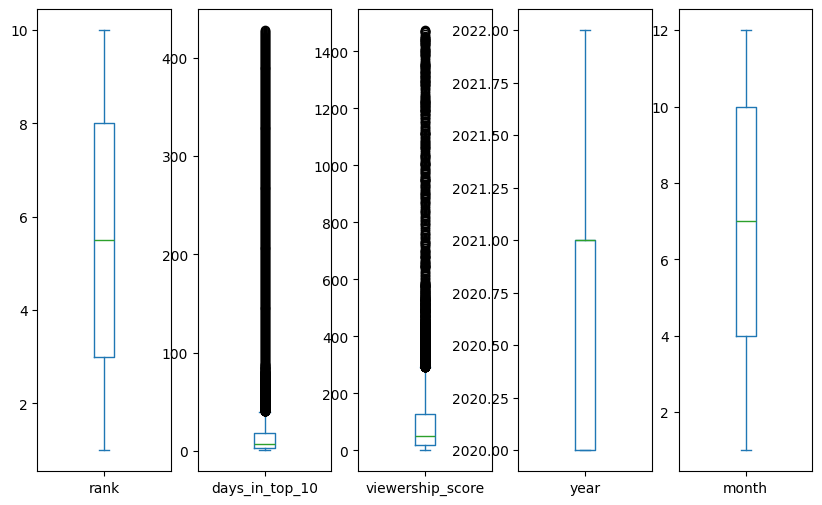

In [24]:
# Verificando melhor as informações
df_netflix.plot(kind='box', figsize=(10,6), subplots=True);

### Outliers

In [25]:
df_netflix[df_netflix['days_in_top_10'] >= 100]

,as_of,rank,year_to_date_rank,last_week_rank,title,type,netflix_exclusive,netflix_release_date,days_in_top_10,viewership_score,year,month,year-month
2886,2021-01-14,7,6,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",100,287,2021,1,2021-01
2896,2021-01-15,7,7,10,Cocomelon,TV Show,NaN,"Jun 1, 2020",101,291,2021,1,2021-01
2909,2021-01-16,10,7,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",102,292,2021,1,2021-01
2919,2021-01-17,10,10,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",103,293,2021,1,2021-01
3019,2021-01-27,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",104,294,2021,1,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",424,1466,2022,1,2022-01
6687,2022-01-29,8,5,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",425,1469,2022,1,2022-01
6718,2022-02-01,9,-,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",426,1471,2022,2,2022-02
6959,2022-02-25,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",427,1472,2022,2,2022-02


In [29]:
#Verificando quantidade de titulos
df_netflix.title.value_counts()

title
Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Lucky One                     1
Fistful of Vengeance              1
Dark Shadows                      1
Scary Stories to Tell in th…      1
Chosen                            1
Name: count, Length: 645, dtype: int64

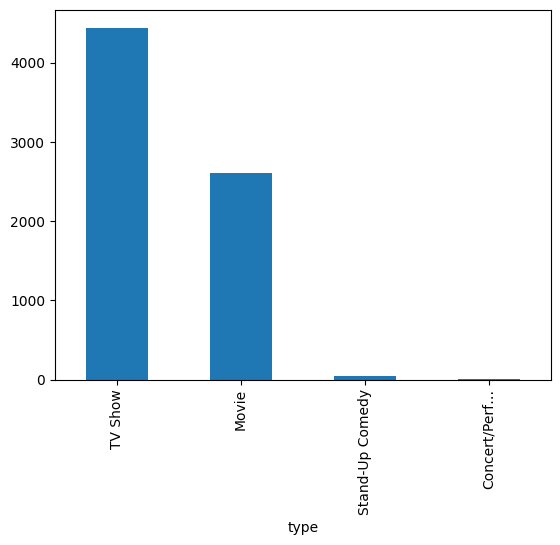

In [30]:
# Verificando quantidade de tipos
df_netflix.type.value_counts().plot(kind='bar');

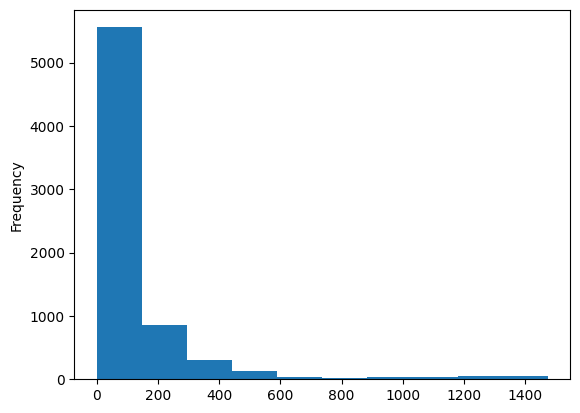

In [31]:
# Verificando pontos de audiencia
df_netflix['viewership_score'].plot(kind='hist');

In [33]:
# Verificando a programação com maior pontos de audiencia
df_netflix[df_netflix['viewership_score'] == df_netflix['viewership_score'].max()]


,as_of,rank,year_to_date_rank,last_week_rank,title,type,netflix_exclusive,netflix_release_date,days_in_top_10,viewership_score,year,month,year-month
6998,2022-03-01,9,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",428,1474,2022,3,2022-03
